In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
train_df = pd.read_csv('../03_Data_for_Modeling/train_xgboost.csv')
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train = train_df.drop(columns=['time_window'])
y_train = train_df['time_window']

valid_df = pd.read_csv('../03_Data_for_Modeling/val_xgboost.csv')
valid_df = valid_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_valid = valid_df.drop(columns=['time_window'])
y_valid = valid_df['time_window']

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time= 4.2min
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100, subsample=1.0; total time= 2.7min
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.9; total time=15.1min
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=500, subsample=0.9; total time=22.0min
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time= 4.1min
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=8, n_estimators=400, subsample=0.8; total time=14.4min
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time= 3.9min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time= 1.2min
[CV] END col

[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time= 2.1min
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time= 2.9min
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8; total time= 6.4min
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time= 9.2min
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, n_estimators=100, subsample=1.0; total time= 3.3min
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100, subsample=0.9; total time= 2.3min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=0.8; total time=13.0min
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time= 5.3min
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, n_estimators=

[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time= 2.9min
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time= 4.8min
[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time= 8.5min
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=  50.2s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=4, n_estimators=400, subsample=1.0; total time= 7.4min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time= 2.7min
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, n_estimators=400, subsample=1.0; total time= 3.8min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=  43.9s
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimato

[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time= 5.5min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=8, n_estimators=400, subsample=1.0; total time=19.8min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.8; total time=15.1min
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.9; total time= 5.6min
[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time= 4.8min
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time= 4.8min
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=8, n_estimators=400, subsample=1.0; total time= 7.4min
[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=4, n_estimators=500, subsample=0.8; total time= 5.7min
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=4, n_estimato

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0; total time=10.0min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=500, subsample=0.8; total time=16.8min
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time= 4.3min
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=100, subsample=1.0; total time= 3.3min
[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.9; total time=12.0min
[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.8; total time= 7.2min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=6, n_estimators=500, subsample=0.9; total time=17.5min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=0.9; total time= 9.4min
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, n_estimators

/home/jiax1/.local/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.37420	validation_1-mlogloss:1.37670
[1]	validation_0-mlogloss:1.36306	validation_1-mlogloss:1.36820
[2]	validation_0-mlogloss:1.35152	validation_1-mlogloss:1.35947
[3]	validation_0-mlogloss:1.33903	validation_1-mlogloss:1.35120
[4]	validation_0-mlogloss:1.33139	validation_1-mlogloss:1.34406
[5]	validation_0-mlogloss:1.32238	validation_1-mlogloss:1.33733
[6]	validation_0-mlogloss:1.31390	validation_1-mlogloss:1.33053
[7]	validation_0-mlogloss:1.30680	validation_1-mlogloss:1.32443
[8]	validation_0-mlogloss:1.29855	validation_1-mlogloss:1.31899
[9]	validation_0-mlogloss:1.28930	validation_1-mlogloss:1.31350
[10]	validation_0-mlogloss:1.28009	validation_1-mlogloss:1.30833
[11]	validation_0-mlogloss:1.27311	validation_1-mlogloss:1.30328
[12]	validation_0-mlogloss:1.26500	validation_1-mlogloss:1.29898
[13]	validation_0-mlogloss:1.25755	validation_1-mlogloss:1.29452
[14]	validation_0-mlogloss:1.25171	validation_1-mlogloss:1.29045
[15]	validation_0-mlogloss:1.24460	

[109]	validation_0-mlogloss:1.09592	validation_1-mlogloss:1.24350
[110]	validation_0-mlogloss:1.09567	validation_1-mlogloss:1.24339
[111]	validation_0-mlogloss:1.09535	validation_1-mlogloss:1.24341
[112]	validation_0-mlogloss:1.09507	validation_1-mlogloss:1.24337
[113]	validation_0-mlogloss:1.09479	validation_1-mlogloss:1.24331
[114]	validation_0-mlogloss:1.09448	validation_1-mlogloss:1.24334
[115]	validation_0-mlogloss:1.09418	validation_1-mlogloss:1.24344
[116]	validation_0-mlogloss:1.09390	validation_1-mlogloss:1.24349
[117]	validation_0-mlogloss:1.09358	validation_1-mlogloss:1.24381
[118]	validation_0-mlogloss:1.09329	validation_1-mlogloss:1.24403
[119]	validation_0-mlogloss:1.09301	validation_1-mlogloss:1.24409
[120]	validation_0-mlogloss:1.09268	validation_1-mlogloss:1.24445
[121]	validation_0-mlogloss:1.09241	validation_1-mlogloss:1.24463
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.9; total time= 6.6min
[CV] END colsample_bytree=

[220]	validation_0-mlogloss:1.07362	validation_1-mlogloss:1.25308
[221]	validation_0-mlogloss:1.07350	validation_1-mlogloss:1.25317
[222]	validation_0-mlogloss:1.07337	validation_1-mlogloss:1.25317
[223]	validation_0-mlogloss:1.07327	validation_1-mlogloss:1.25329
[224]	validation_0-mlogloss:1.07312	validation_1-mlogloss:1.25335
[225]	validation_0-mlogloss:1.07300	validation_1-mlogloss:1.25336
[226]	validation_0-mlogloss:1.07288	validation_1-mlogloss:1.25334
[227]	validation_0-mlogloss:1.07274	validation_1-mlogloss:1.25330
[228]	validation_0-mlogloss:1.07262	validation_1-mlogloss:1.25326
[229]	validation_0-mlogloss:1.07246	validation_1-mlogloss:1.25322
[230]	validation_0-mlogloss:1.07234	validation_1-mlogloss:1.25323
[231]	validation_0-mlogloss:1.07224	validation_1-mlogloss:1.25329
[232]	validation_0-mlogloss:1.07208	validation_1-mlogloss:1.25331
[233]	validation_0-mlogloss:1.07192	validation_1-mlogloss:1.25325
[234]	validation_0-mlogloss:1.07177	validation_1-mlogloss:1.25326
[235]	vali

[336]	validation_0-mlogloss:1.06012	validation_1-mlogloss:1.25325
[337]	validation_0-mlogloss:1.06001	validation_1-mlogloss:1.25325
[338]	validation_0-mlogloss:1.05989	validation_1-mlogloss:1.25323
[339]	validation_0-mlogloss:1.05983	validation_1-mlogloss:1.25324
[340]	validation_0-mlogloss:1.05975	validation_1-mlogloss:1.25323
[341]	validation_0-mlogloss:1.05963	validation_1-mlogloss:1.25320
[342]	validation_0-mlogloss:1.05951	validation_1-mlogloss:1.25321
[343]	validation_0-mlogloss:1.05941	validation_1-mlogloss:1.25321
[344]	validation_0-mlogloss:1.05932	validation_1-mlogloss:1.25325
[345]	validation_0-mlogloss:1.05924	validation_1-mlogloss:1.25324
[346]	validation_0-mlogloss:1.05916	validation_1-mlogloss:1.25326
[347]	validation_0-mlogloss:1.05903	validation_1-mlogloss:1.25322
[348]	validation_0-mlogloss:1.05889	validation_1-mlogloss:1.25317
[349]	validation_0-mlogloss:1.05884	validation_1-mlogloss:1.25318
[350]	validation_0-mlogloss:1.05875	validation_1-mlogloss:1.25316
[351]	vali

[443]	validation_0-mlogloss:1.04988	validation_1-mlogloss:1.25287
[444]	validation_0-mlogloss:1.04979	validation_1-mlogloss:1.25289
[445]	validation_0-mlogloss:1.04972	validation_1-mlogloss:1.25290
[446]	validation_0-mlogloss:1.04965	validation_1-mlogloss:1.25289
[447]	validation_0-mlogloss:1.04954	validation_1-mlogloss:1.25287
[448]	validation_0-mlogloss:1.04948	validation_1-mlogloss:1.25286
[449]	validation_0-mlogloss:1.04939	validation_1-mlogloss:1.25285
[450]	validation_0-mlogloss:1.04930	validation_1-mlogloss:1.25285
[451]	validation_0-mlogloss:1.04919	validation_1-mlogloss:1.25284
[452]	validation_0-mlogloss:1.04911	validation_1-mlogloss:1.25288
[453]	validation_0-mlogloss:1.04905	validation_1-mlogloss:1.25288
[454]	validation_0-mlogloss:1.04893	validation_1-mlogloss:1.25286
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time= 2.7min
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=

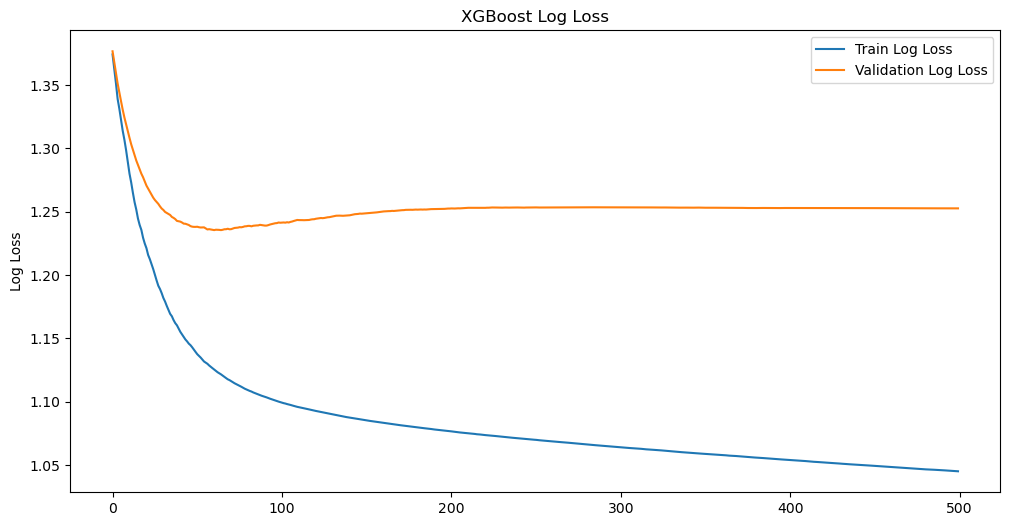

[CV] END colsample_bytree=0.4, learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8; total time= 2.1min
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=1.0; total time= 3.4min
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=1.0; total time= 7.7min
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, n_estimators=400, subsample=0.8; total time= 8.4min
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=8, n_estimators=500, subsample=0.9; total time= 8.3min


KeyError: 'merror'

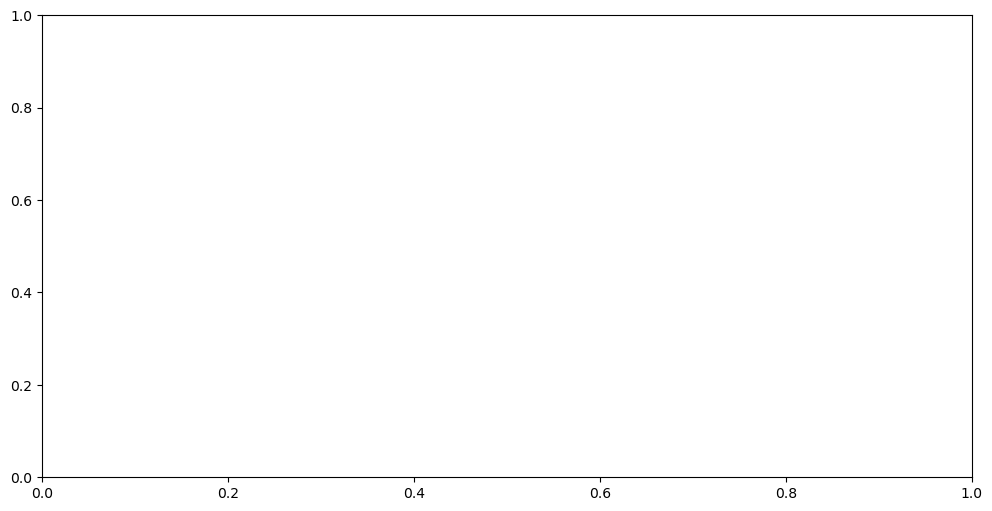

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=1.0; total time= 5.8min
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.9; total time= 3.1min
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time= 3.8min
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time= 1.8min
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time= 2.5min
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=500, subsample=0.9; total time=12.9min
[CV] END colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=400, subsample=1.0; total time= 5.9min
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators

In [13]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6]
}

xgb_model = XGBClassifier(objective='multi:softmax', num_class=4)

random_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                               n_iter=100, scoring='accuracy', cv=4, verbose=2, 
                               random_state=42, n_jobs=-1)

random_cv.fit(X_train, y_train)

best_params = random_cv.best_params_
joblib.dump(best_params, 'best_hyperparameters.pkl')

eval_set = [(X_train, y_train), (X_valid, y_valid)]
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train, eval_metric=["mlogloss", "merror"], eval_set=eval_set, verbose=True)

results = best_xgb_model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train Log Loss')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation Log Loss')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['merror'], label='Train Error')
ax.plot(x_axis, results['validation_1']['merror'], label='Validation Error')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

train_accuracy = [1 - x for x in results['validation_0']['merror']]
validation_accuracy = [1 - x for x in results['validation_1']['merror']]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, train_accuracy, label='Train Accuracy')
ax.plot(x_axis, validation_accuracy, label='Validation Accuracy')
ax.legend()
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy')
plt.show()

y_pred_best = best_xgb_model.predict(X_valid)

cm_best = confusion_matrix(y_valid, y_pred_best)
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the Best Model')
plt.show()

In [14]:
best_hyperparameters = random_cv.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, val in best_hyperparameters.items():
    print(f"{param}: {val}")

Best Hyperparameters:
subsample: 0.9
n_estimators: 500
max_depth: 6
learning_rate: 0.05
colsample_bytree: 0.6


[0]	validation_0-mlogloss:1.37420	validation_0-merror:0.55377	validation_1-mlogloss:1.37670	validation_1-merror:0.60335
[1]	validation_0-mlogloss:1.36306	validation_0-merror:0.53106	validation_1-mlogloss:1.36820	validation_1-merror:0.59627
[2]	validation_0-mlogloss:1.35152	validation_0-merror:0.53036	validation_1-mlogloss:1.35947	validation_1-merror:0.59726
[3]	validation_0-mlogloss:1.33903	validation_0-merror:0.52749	validation_1-mlogloss:1.35120	validation_1-merror:0.59954
[4]	validation_0-mlogloss:1.33139	validation_0-merror:0.52771	validation_1-mlogloss:1.34406	validation_1-merror:0.59654
[5]	validation_0-mlogloss:1.32238	validation_0-merror:0.52860	validation_1-mlogloss:1.33733	validation_1-merror:0.59730
[6]	validation_0-mlogloss:1.31390	validation_0-merror:0.52968	validation_1-mlogloss:1.33053	validation_1-merror:0.59593
[7]	validation_0-mlogloss:1.30680	validation_0-merror:0.53055	validation_1-mlogloss:1.32443	validation_1-merror:0.59589
[8]	validation_0-mlogloss:1.29855	valida

[68]	validation_0-mlogloss:1.11768	validation_0-merror:0.51208	validation_1-mlogloss:1.23656	validation_1-merror:0.59673
[69]	validation_0-mlogloss:1.11705	validation_0-merror:0.51200	validation_1-mlogloss:1.23615	validation_1-merror:0.59646
[70]	validation_0-mlogloss:1.11627	validation_0-merror:0.51188	validation_1-mlogloss:1.23624	validation_1-merror:0.59671
[71]	validation_0-mlogloss:1.11539	validation_0-merror:0.51161	validation_1-mlogloss:1.23667	validation_1-merror:0.59682
[72]	validation_0-mlogloss:1.11455	validation_0-merror:0.51149	validation_1-mlogloss:1.23719	validation_1-merror:0.59692
[73]	validation_0-mlogloss:1.11388	validation_0-merror:0.51140	validation_1-mlogloss:1.23735	validation_1-merror:0.59682
[74]	validation_0-mlogloss:1.11321	validation_0-merror:0.51098	validation_1-mlogloss:1.23745	validation_1-merror:0.59675
[75]	validation_0-mlogloss:1.11245	validation_0-merror:0.51086	validation_1-mlogloss:1.23781	validation_1-merror:0.59671
[76]	validation_0-mlogloss:1.111

[136]	validation_0-mlogloss:1.08831	validation_0-merror:0.50414	validation_1-mlogloss:1.24680	validation_1-merror:0.59492
[137]	validation_0-mlogloss:1.08806	validation_0-merror:0.50411	validation_1-mlogloss:1.24688	validation_1-merror:0.59481
[138]	validation_0-mlogloss:1.08784	validation_0-merror:0.50398	validation_1-mlogloss:1.24703	validation_1-merror:0.59481
[139]	validation_0-mlogloss:1.08764	validation_0-merror:0.50394	validation_1-mlogloss:1.24709	validation_1-merror:0.59484
[140]	validation_0-mlogloss:1.08743	validation_0-merror:0.50397	validation_1-mlogloss:1.24719	validation_1-merror:0.59488
[141]	validation_0-mlogloss:1.08721	validation_0-merror:0.50373	validation_1-mlogloss:1.24750	validation_1-merror:0.59486
[142]	validation_0-mlogloss:1.08697	validation_0-merror:0.50375	validation_1-mlogloss:1.24777	validation_1-merror:0.59482
[143]	validation_0-mlogloss:1.08675	validation_0-merror:0.50371	validation_1-mlogloss:1.24804	validation_1-merror:0.59482
[144]	validation_0-mlogl

[204]	validation_0-mlogloss:1.07589	validation_0-merror:0.49858	validation_1-mlogloss:1.25270	validation_1-merror:0.59256
[205]	validation_0-mlogloss:1.07570	validation_0-merror:0.49853	validation_1-mlogloss:1.25266	validation_1-merror:0.59252
[206]	validation_0-mlogloss:1.07557	validation_0-merror:0.49856	validation_1-mlogloss:1.25275	validation_1-merror:0.59262
[207]	validation_0-mlogloss:1.07542	validation_0-merror:0.49844	validation_1-mlogloss:1.25282	validation_1-merror:0.59233
[208]	validation_0-mlogloss:1.07530	validation_0-merror:0.49847	validation_1-mlogloss:1.25289	validation_1-merror:0.59243
[209]	validation_0-mlogloss:1.07517	validation_0-merror:0.49827	validation_1-mlogloss:1.25299	validation_1-merror:0.59243
[210]	validation_0-mlogloss:1.07507	validation_0-merror:0.49818	validation_1-mlogloss:1.25309	validation_1-merror:0.59229
[211]	validation_0-mlogloss:1.07492	validation_0-merror:0.49809	validation_1-mlogloss:1.25306	validation_1-merror:0.59233
[212]	validation_0-mlogl

[272]	validation_0-mlogloss:1.06720	validation_0-merror:0.49330	validation_1-mlogloss:1.25348	validation_1-merror:0.59176
[273]	validation_0-mlogloss:1.06709	validation_0-merror:0.49330	validation_1-mlogloss:1.25350	validation_1-merror:0.59161
[274]	validation_0-mlogloss:1.06697	validation_0-merror:0.49316	validation_1-mlogloss:1.25350	validation_1-merror:0.59151
[275]	validation_0-mlogloss:1.06685	validation_0-merror:0.49312	validation_1-mlogloss:1.25351	validation_1-merror:0.59149
[276]	validation_0-mlogloss:1.06672	validation_0-merror:0.49308	validation_1-mlogloss:1.25350	validation_1-merror:0.59149
[277]	validation_0-mlogloss:1.06659	validation_0-merror:0.49291	validation_1-mlogloss:1.25347	validation_1-merror:0.59134
[278]	validation_0-mlogloss:1.06647	validation_0-merror:0.49284	validation_1-mlogloss:1.25356	validation_1-merror:0.59125
[279]	validation_0-mlogloss:1.06634	validation_0-merror:0.49274	validation_1-mlogloss:1.25356	validation_1-merror:0.59117
[280]	validation_0-mlogl

[340]	validation_0-mlogloss:1.05975	validation_0-merror:0.48815	validation_1-mlogloss:1.25323	validation_1-merror:0.58995
[341]	validation_0-mlogloss:1.05963	validation_0-merror:0.48815	validation_1-mlogloss:1.25320	validation_1-merror:0.59003
[342]	validation_0-mlogloss:1.05951	validation_0-merror:0.48808	validation_1-mlogloss:1.25321	validation_1-merror:0.58982
[343]	validation_0-mlogloss:1.05941	validation_0-merror:0.48806	validation_1-mlogloss:1.25321	validation_1-merror:0.58974
[344]	validation_0-mlogloss:1.05932	validation_0-merror:0.48791	validation_1-mlogloss:1.25325	validation_1-merror:0.58982
[345]	validation_0-mlogloss:1.05924	validation_0-merror:0.48790	validation_1-mlogloss:1.25324	validation_1-merror:0.58974
[346]	validation_0-mlogloss:1.05916	validation_0-merror:0.48784	validation_1-mlogloss:1.25326	validation_1-merror:0.58976
[347]	validation_0-mlogloss:1.05903	validation_0-merror:0.48767	validation_1-mlogloss:1.25322	validation_1-merror:0.58978
[348]	validation_0-mlogl

[408]	validation_0-mlogloss:1.05319	validation_0-merror:0.48330	validation_1-mlogloss:1.25294	validation_1-merror:0.58944
[409]	validation_0-mlogloss:1.05310	validation_0-merror:0.48326	validation_1-mlogloss:1.25293	validation_1-merror:0.58950
[410]	validation_0-mlogloss:1.05297	validation_0-merror:0.48324	validation_1-mlogloss:1.25291	validation_1-merror:0.58961
[411]	validation_0-mlogloss:1.05281	validation_0-merror:0.48312	validation_1-mlogloss:1.25291	validation_1-merror:0.58957
[412]	validation_0-mlogloss:1.05271	validation_0-merror:0.48312	validation_1-mlogloss:1.25295	validation_1-merror:0.58950
[413]	validation_0-mlogloss:1.05262	validation_0-merror:0.48301	validation_1-mlogloss:1.25295	validation_1-merror:0.58934
[414]	validation_0-mlogloss:1.05252	validation_0-merror:0.48292	validation_1-mlogloss:1.25295	validation_1-merror:0.58927
[415]	validation_0-mlogloss:1.05247	validation_0-merror:0.48287	validation_1-mlogloss:1.25295	validation_1-merror:0.58923
[416]	validation_0-mlogl

[476]	validation_0-mlogloss:1.04691	validation_0-merror:0.47919	validation_1-mlogloss:1.25276	validation_1-merror:0.58856
[477]	validation_0-mlogloss:1.04684	validation_0-merror:0.47913	validation_1-mlogloss:1.25274	validation_1-merror:0.58853
[478]	validation_0-mlogloss:1.04670	validation_0-merror:0.47896	validation_1-mlogloss:1.25273	validation_1-merror:0.58837
[479]	validation_0-mlogloss:1.04663	validation_0-merror:0.47888	validation_1-mlogloss:1.25272	validation_1-merror:0.58849
[480]	validation_0-mlogloss:1.04655	validation_0-merror:0.47879	validation_1-mlogloss:1.25271	validation_1-merror:0.58855
[481]	validation_0-mlogloss:1.04650	validation_0-merror:0.47872	validation_1-mlogloss:1.25272	validation_1-merror:0.58851
[482]	validation_0-mlogloss:1.04642	validation_0-merror:0.47866	validation_1-mlogloss:1.25273	validation_1-merror:0.58851
[483]	validation_0-mlogloss:1.04635	validation_0-merror:0.47861	validation_1-mlogloss:1.25274	validation_1-merror:0.58841
[484]	validation_0-mlogl

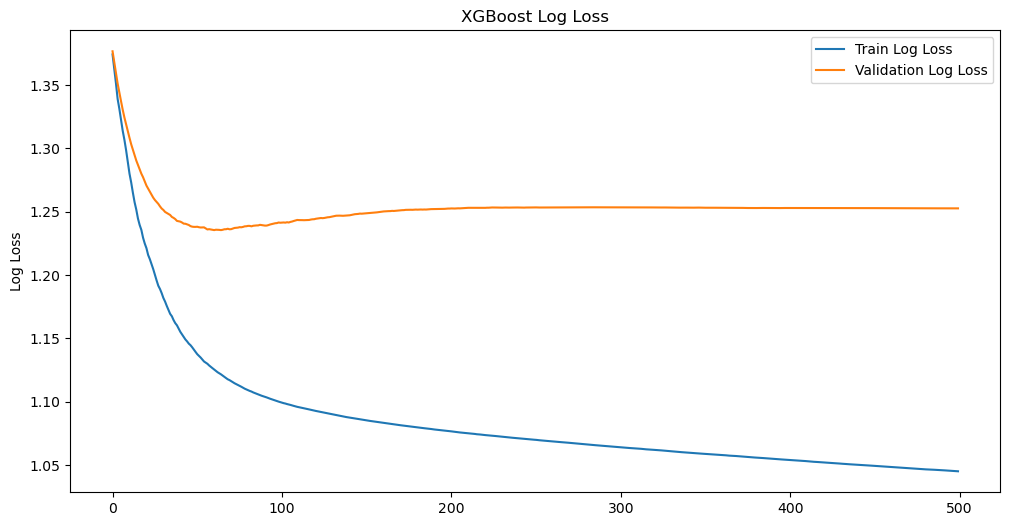

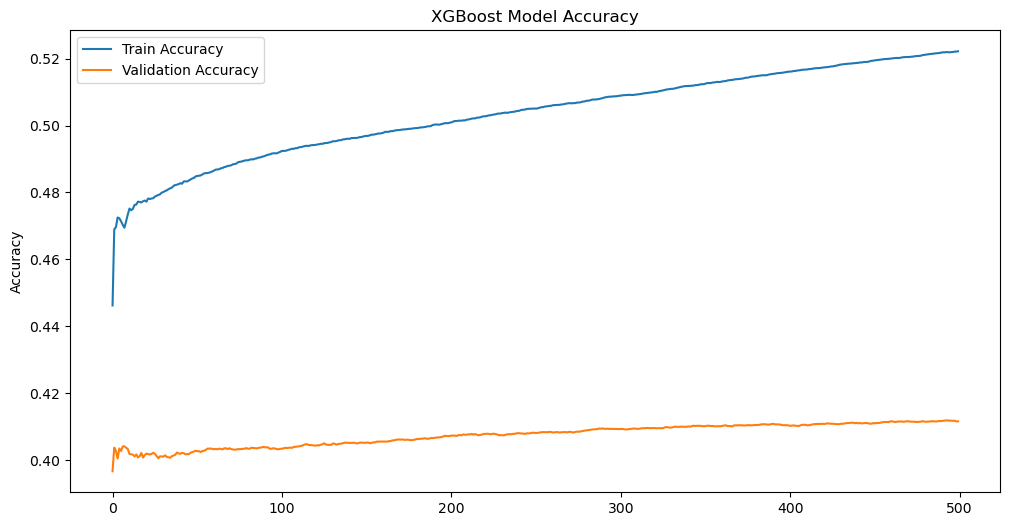

NameError: name 'ConfusionMatrixDisplay' is not defined

In [15]:
best_xgb_model = xgb.XGBClassifier(
    subsample=0.9,
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    colsample_bytree=0.6,
    objective='multi:softmax',
    num_class=4,
    eval_metric=["mlogloss", "merror"]
)

# Fit the model on the training data
eval_set = [(X_train, y_train), (X_valid, y_valid)]
best_xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Get the results from the model
results = best_xgb_model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Plot Log Loss for Training and Validation
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train Log Loss')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation Log Loss')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plot Accuracy for Training and Validation
train_accuracy = [1 - x for x in results['validation_0']['merror']]
validation_accuracy = [1 - x for x in results['validation_1']['merror']]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, train_accuracy, label='Train Accuracy')
ax.plot(x_axis, validation_accuracy, label='Validation Accuracy')
ax.legend()
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy')
plt.show()

# Generate and plot the confusion matrix
y_pred = best_xgb_model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)

# Use ConfusionMatrixDisplay for a better visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the Best Model')
plt.show()

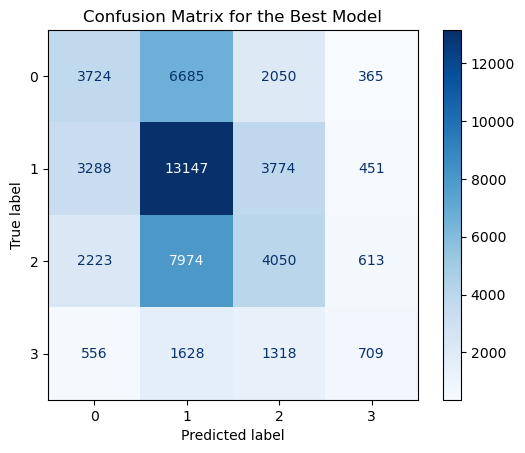

In [18]:
# Generate and plot the confusion matrix
y_pred = best_xgb_model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)

# Use ConfusionMatrixDisplay for a better visual
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the Best Model')
plt.show()